# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# Select three indices of your choice you wish to sample from the dataset
indices = [85,283,426]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,25767,3613,2013,10303,314,1384
2,13134,9347,14316,3141,5079,1894


     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
85    73.2  99.5    100.0    36.8             100.0          90.0
283   88.6  49.8     21.8    95.7              29.8          64.3
426   67.3  83.2     84.5    71.6              82.0          77.5


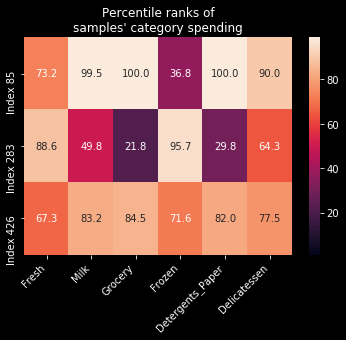

In [4]:
# Implement a heat map to visualize the respective rankings of the randomly chosen indices
plt.style.use('dark_background')
def heatmap_of_samples():
    # look at percentile ranks
    perc = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
    print(perc)

    # visualise percentiles with heatmap
    sns.heatmap(perc, yticklabels=['Index '+str(x) for x in indices], annot=True, vmin=1, vmax=99, fmt='.1f')
    plt.title('Percentile ranks of\nsamples\' category spending')
    plt.xticks(rotation=45, ha='right');

heatmap_of_samples()

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

For the first index, the customer is far above average spend with regards to Milk, Grocery, Detergents_Paper, and Delicatessen.  The spend in these categories are in the 90th percentile and above, signifying that they are among the highest spenders in our dataset.  Due to the high variety of goods purchased, as well as the high spend in detergents/paper, I believe they are a fairly large general grocery store offering a lot of variety.

The second index is below average in all categories except for fresh and frozen.  Additionaly, their overall scale of spending is low except for the aforementioned categories.  This leads me to believe that they are a smaller operation, likely a snack stand, possibly one that offers options such as smoothies or juice as well.  The fact that they are far below average in milk, grocery, delicatessen, and detergents/paper signifies that they have little variety and likely concentrate on frozen and fresh produce, of which they are in the 96th and 89th percentile respectively.

The third index is fairly average in all aspects.  They are right around the 3rd quartile for all categories, and do not appear to be leaning in any one direction for their spend.  This leads me to believe that they are a smaller general neighberhood market.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery',axis=1)

# Split the data into training and testing sets(0.25) using the given feature as the target.

X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size=.33, random_state=42)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print('The coefficinet of determination is: {}'.format(score))

The coefficinet of determination is: 0.6362158787134857


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

I attempted to predict the Grocery spend of a customer using a Decision Tree Regressor.  The reported coefficient of determination was .64, implying that the feature point is able to be predicted relatively accurately by the other data features.  This means that the grocery spend feature is not as important in considering for our model as it is highly correlated with the other features and can be represented by some combination of the other categories.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

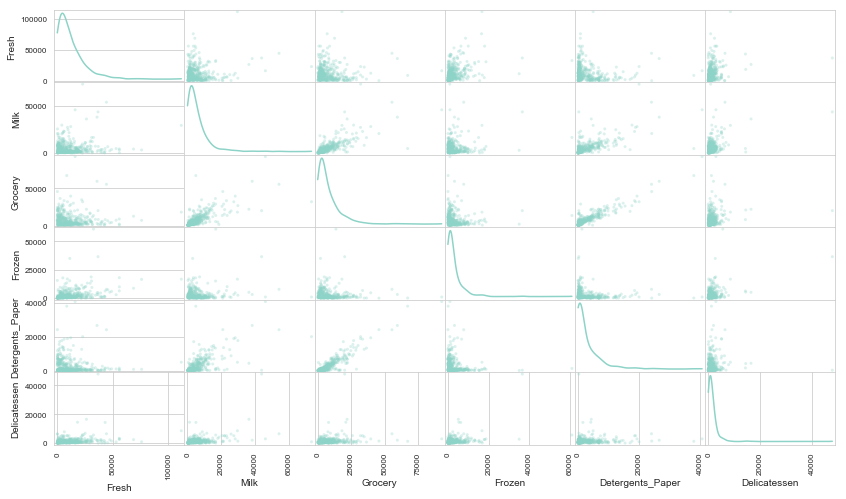

In [6]:
# Produce a scatter matrix for each pair of features in the data
sns.set_style("whitegrid")
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

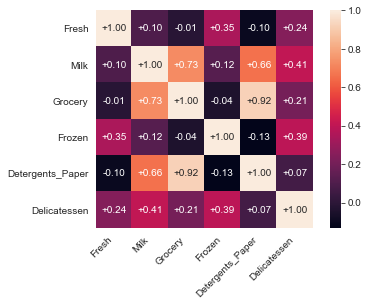

In [7]:
corr = data.corr()
ax = sns.heatmap(corr,square=True, annot=True, fmt='+.2f')
plt.xticks(rotation=45,ha='right');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

The distribution of the data, as evident by the pairplot above, is not normal.  It appears more likely to be a poisson distribution skewed towards 0.  Grocery and Detergents/Paper appear to have the highest overall correlation at .92, with grocery and milk also exhibiting a high correlation score of .73.  This confirms my previous statement in question 2, that overall grocery spend is able to be calculated with a fair degree of accuracy based on the other features present.  There is a statistically significant relationship/correlation between Grocery, Milk, and Detergents/Paper spend.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

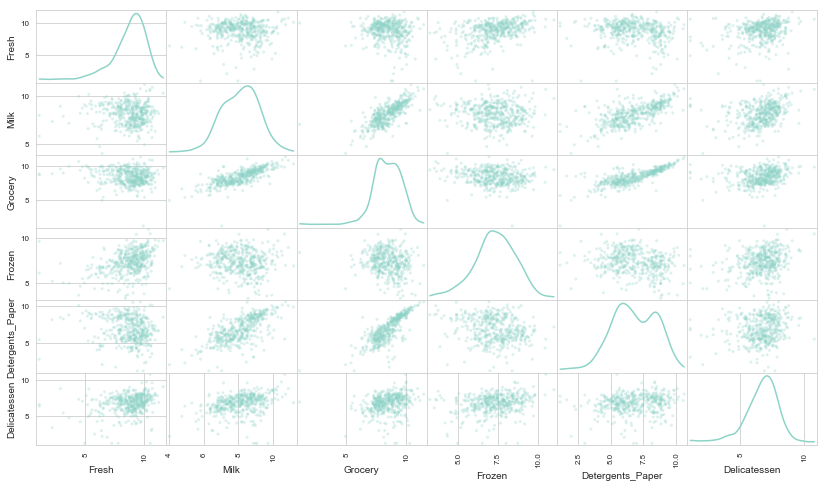

In [8]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.68763,10.740670,11.437986,6.933423,10.617099,7.987524
1,10.15685,8.192294,7.607381,9.240190,5.749393,7.232733
2,9.48296,9.142811,9.569133,8.052296,8.532870,7.546446


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
# For each feature find the data points with extreme high or low values
ouliers_feature = {}
for feature in log_data.keys():
    
    # TCalculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    ouliers_feature[feature] = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(ouliers_feature[feature])
    

# An obersvation will only be considered an outlier if two or more features are outliers

from collections import Counter
all_indices = [df.index.tolist() for feature, df in ouliers_feature.items()]
flattened_indices = [index for index_list in all_indices for index in index_list]
outliers  = [index for index, count in Counter(flattened_indices).items() if count > 1]
print("Indices for rows that include outliers for multiple features: '{}'".format(outliers))

# Remove the outliers
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Indices for rows that include outliers for multiple features: '[65, 66, 128, 154, 75]'


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

There are five observations that include outliers for more than one features. These data points shoud be removed have been added to the outliers list.  The K-means algorithm updates cluster centers by taking the average of all cluster data points.  This works nicely when all points are packed closely together; however, when outliers are involved this pushes the cluster center closer to the outlier.  This will make our clusters less accurate and insightful, therefore they should be removed from the data.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

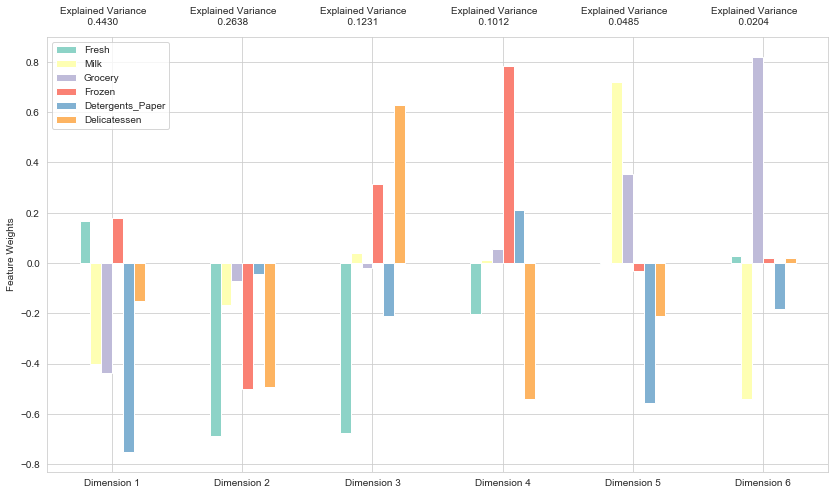

In [11]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The first and second principal component account for roughly 71% of the overall variance.  When adding the next two components, the top four principal components account for 93% of total variance.

1)  The first principal component places positive weights only on the fresh and frozen categories, with all other features showing negatively.  This is especially the case for detergents/paper as they have nearly twice the average negative weight.  This component appears to represent spend on fresh or frozen goods, mainly items such as fresh or frozen fruit/vegetables/meats.  This is shown by the extreme negative weight in detergents/paper and also in the grocery, milk, and delicatessen categories.  I interpret this as a customer segment likely to stay away from packaged consumable products and more towards those needed for food preperation.  This could distinguish between customers who primarly purchase raw ingredients for cooking, such as restaraunts, and those who purchase pre-packaged goods for resale.

2)  The second component seems to put a highly negative weight on fresh, frozen, and delicatessen categories.  This leads me to believe that they primarily purchase pre-packaged goods such as milk, groceries, and detergents/paper likely a resaler or general goods type of shop. This is completely opposite of the first principle component, which makes sense as this component is orthogonal to the first.

3)  The third component places a large emphasis on delicatessen and frozen goods.  It is also very negatively corrleated with fresh goods.  This component likely represents a butcher shop, or a restaraunt specializing in meat products.  This seems as if it would be a very good differentiatior between more plant/vegetarian based customers with meat/protein based.

4)  This component shows a strong positive weight towards frozen foods and a highly negative correlation with delicatessen.  The customer segment explained by this representation is likely one that deals with a lot of frozen products for use over a longer period of time.  

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,1.6302,-2.0843,0.2416,0.6619,0.1491,-0.4524
2,-2.0740,-1.5983,-0.0683,0.4013,-0.0483,0.0983


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

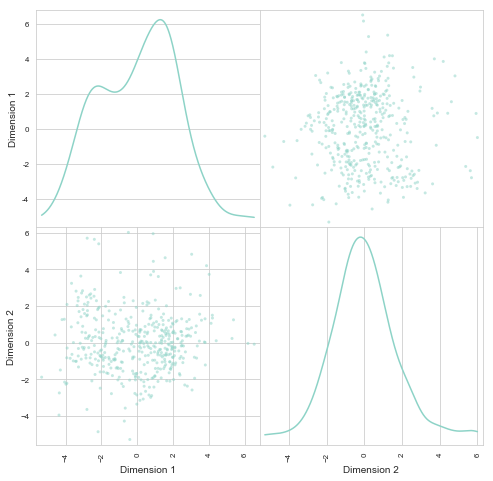

In [13]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
pd.plotting.scatter_matrix(reduced_data, figsize = (8,8), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,1.6302,-2.0843
2,-2.0740,-1.5983


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

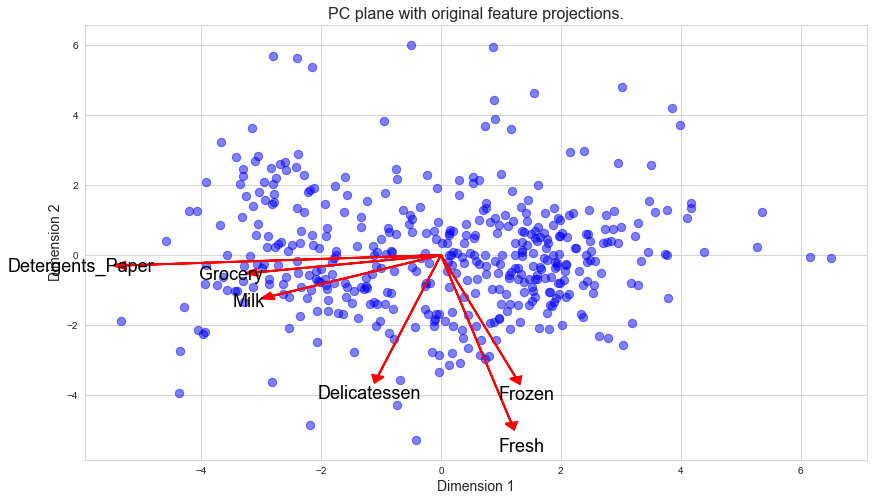

In [15]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?


The results exactly match the previous data displayed through the pca_results function.  Detergents_paper shows the highest correlation with the first dimension, and Fresh shows the highest for the second dimension.  This is visible through the overall magnitude of the component vectors in the above visualization


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

The advantage of using a K-Means clustering algorithm is that it is fast, robust, and has easiliy interpreted results. It utilizes hard clustering, meaning each point uniquely belongs to a cluster.  

Gaudssian Mixture modeling assumes that each cluster follows a given probability distribution.  It is a soft-clustering algorithm, which gives it more flexibility than K-Means. It can sometimes have a slow convergence rate making it not quite as efficient of K-Means.

Given what we have seen in the data, there is a high degree of variability.  This is clearly evident as  all categories of spend have a standard deviation exceeds the mean.  For this reason Gaussian Mixture Modeling is the best algorithm, as we will need the flexibility it offers to get a good clustering.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


def Cluster(n_clusters):

    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    
    print('The Silhouette Score for %.f clusters is %.2f'%(n_clusters,score))
    
    return (preds, centers, sample_preds, score)

for n_clusters in range(2,16):
    Cluster(n_clusters)
    
print('\nThe best Slihouette Score is for 2 clusters.')
preds, centers, sample_preds, score = Cluster(2)

The Silhouette Score for 2 clusters is 0.42
The Silhouette Score for 3 clusters is 0.40
The Silhouette Score for 4 clusters is 0.34
The Silhouette Score for 5 clusters is 0.28
The Silhouette Score for 6 clusters is 0.33
The Silhouette Score for 7 clusters is 0.31
The Silhouette Score for 8 clusters is 0.27
The Silhouette Score for 9 clusters is 0.32
The Silhouette Score for 10 clusters is 0.32
The Silhouette Score for 11 clusters is 0.32
The Silhouette Score for 12 clusters is 0.33
The Silhouette Score for 13 clusters is 0.33
The Silhouette Score for 14 clusters is 0.33
The Silhouette Score for 15 clusters is 0.31

The best Slihouette Score is for 2 clusters.
The Silhouette Score for 2 clusters is 0.42


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

The silhouette score for 2 clusters was the best, coming in at .42.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

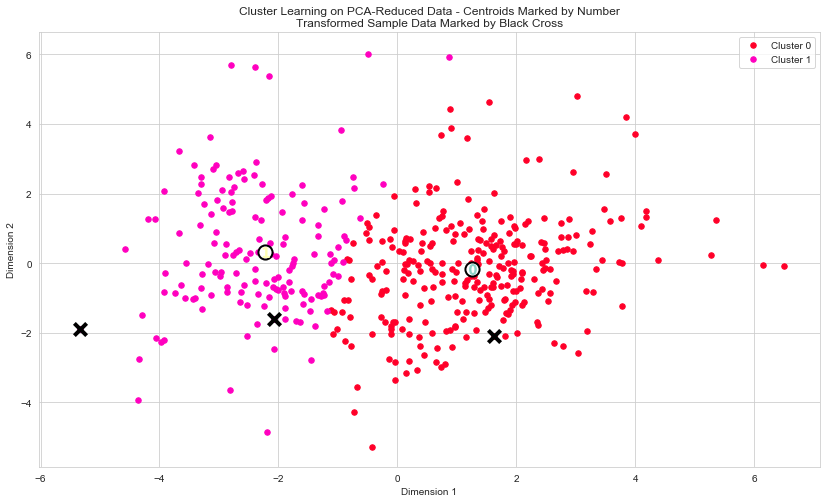

In [17]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [18]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8939.0,2108.0,2758.0,2073.0,352.0,730.0
Segment 1,3567.0,7860.0,12249.0,873.0,4713.0,966.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Segment 0:  Customers belonging to the 1st segment spend a much higher amount in relation to the 2nd.  This is true for all categories with the exception of Fresh and Frozen.  This makes sense as the 2nd principal component is the orthogonal complement of the first.  Customers in this segment spend in the 4th quartile of Milk, Grocery, and Detergents_Paper.  Given this, it is likely that they are large retailers or distributors and are purchasing their goods for resale.

Segment 1:  The 2nd principal component generalizes to a segment with below average spend in every category.  All categories fall within the 2nd quartile of values, with the exception of Fresh and Frozen spend, which reside in the 3rd quartile.  This leads me to believe that customers in this category represent a large percentage of the population and have relatively low spend.  The reliance on the Fresh and Frozen categories likely means that these customers are operating small cafe's, restaurant’s, or shops. Due to the very low spend in Grocery, Milk, and Detergents_Paper they are likely buying raw ingredients to prepare meals or snacks for their customers. This category is not likely to represent any resellers.


In [19]:
# Compare cluster centers with mean and percentiles of data set

y = true_centers.transpose()
df = data.append(true_centers,ignore_index=True)
segments = [440,441]
percent = 100. * df.rank(axis=0, pct=True).iloc[segments].round(decimals=2)
y['Mean'] = pd.DataFrame(data.mean())
tab = y.merge(percent.transpose(),how='inner',right_index=True,left_index=True)
mapper = {440:'Segment 0 Percentiles',441:'Segment 1 Percentiles'}
tab.rename(mapper,axis=1,inplace=True)
tab

,Segment 0,Segment 1,Mean,Segment 0 Percentiles,Segment 1 Percentiles
Fresh,8939.0,3567.0,12000.297727,52.0,28.0
Milk,2108.0,7860.0,5796.265909,34.0,79.0
Grocery,2758.0,12249.0,7951.277273,34.0,81.0
Frozen,2073.0,873.0,3071.931818,58.0,31.0
Detergents_Paper,352.0,4713.0,2881.493182,32.0,80.0
Delicatessen,730.0,966.0,1524.870455,41.0,50.0


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [20]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [21]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,25767,3613,2013,10303,314,1384
2,13134,9347,14316,3141,5079,1894


**Answer:**

The first sample is assigned to segment 0.  This makes sense as they are far above the average spend in all categories except for Frozen and Fresh.  This customer is likely a large wholesale distributor, purchasing large amounts of non-perishable groceries, household supplies, and dairy products.

The second sample data point belongs to segment 1.  This is exactly in line with the above analysis as this customer has very high spend in the Fresh and Frozen section.  In addition to this, they have below average spend in every other category.  This leads me to believe that they are a restaraunt or cafe, purchasing food to prepare for customers.

The 3rd sample was assigned to cluster 0.  Like the first sample, this customer specializes in Milk, Grocery, and Detergents_Paper.  Their spend in all categories is slightly above the average, meaning that they are likely a retailer/wholesaler specializing in the sales of wide variety of goods.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**


Changes in the delivery schedule by the distributor will not affect both segments of customers equally.  The first segment of customers are likely retailers and wholesalers.  These companies purchase in bulk and spend a lot more per purchase than the second cluster.  As a result, changing the delivery schedule from 5 to 3 days will not have a large impact on this segment as they are storing goods for future sales. 

The second cluster of smaller restaraunts and cafes will be affected most by this change.  A large portion of their spend is in fresh goods.  By delivering to these customers two times less per week, they are not getting the fresh ingredients as often as they previously were.  This could cause problems with storage and quality of ingredients.  Customers in this segment offer an a just-in-time basis with regards to their inventory.  Also, because they are mostly smaller operations some of the customers in this segment may not have the storage capacity to hold the extra inventory required with less weekly deliveries.

Due to these differences in customer bases, it is likely that will both react differently to the proposed changes.  The A/B test should be rolled out seperately for each group in order to get the best data on the two customer segment's preferences.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

Once we have a given data points cluster label, we can use these to create an additional binary label for which of the two segments the obervation lies within.  This can then be used with any supervised classification algorithm such as logistic regression, support vector machine, or decision trees to classify each new customer to a given segment.  This information can be especially useful in determining the best delivery service for a new customer.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

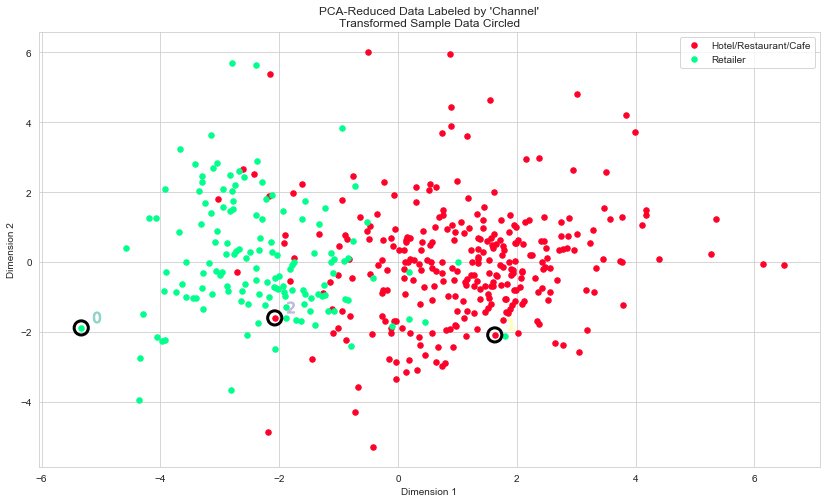

In [22]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

The customer clustering done above is very similar to our initial model.  My description of the two segments is very consistent with the above analysis, as Hotels/Restaurant/Cafe aligns perfectly with the cluster 1 and retailer with cluster 0.  The customer segments are clearlhy classified; however, this algorithm does a messier job than the Gaussian Mixture Model as the boundary between the two segments is not as clearly defined.  Due to the fuzzy decision boundary between the two clusters, the above algorithm classified sample point 2 as a 'Hotel/Restaurant/Cafe' instead of a retailer like the first one.  Other than that it seems to do an alright job, but I believe the first algorithm does a much better job.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.